In [1]:
# importazione librerie utili
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from boruta import BorutaPy 
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, matthews_corrcoef, cohen_kappa_score
from sklearn import metrics
import numpy as np

#C:/Users/Utente/Python
import sys
sys.path.append('C:/Users/Utente/Python')

from SEC_ste import SEC_ste

In [2]:
#load data
data = pd.read_csv(r'C:\Users\Utente\anaconda3\Lib\site-packages\pandas\io\data_covnet_score-imputed_missRF_increasing_1.txt')
print(data.shape)
#creo un array di sole features
features = np.array([f for f in data.columns if f not in ['LABEL']])

#print(categorico)
#creo un array con solo i valori delle features.
X = data[features].values

#ravel() mi fa diventare l'array monodimensionale.
Y = data['LABEL'].values.ravel()

final_features_RFE=list()
final_features_Bor=list()


(301, 42)


In [3]:
#parametri

n_it=15
n_fold=10


In [4]:
#define learning algorithm
rf = RandomForestClassifier(n_estimators = 101, max_depth=11, max_features=None, max_samples=0.75,class_weight="balanced_subsample")


In [5]:
#correct data

In [6]:
#define feature selection
sel_Bor = BorutaPy(rf, n_estimators='auto', verbose=0, max_iter = 50, perc = 40)
sel_RFE = RFE(rf, n_features_to_select=20, step=3)

In [7]:
#define data augmentation 
# data_aug_method= 'smote', 'oversample', 'subsample'

#data_aug_method='smote'

#data_aug_method='oversample'

#data_aug_method='undersample'

data_aug_method='none'

In [8]:
#elaboration
sec_Bor=SEC_ste(X, Y, features, sel_Bor, data_aug_method, rf, n_fold, n_it )
sec_RFE=SEC_ste(X, Y, features, sel_RFE, data_aug_method, rf, n_fold, n_it )



parzial_features_RFE=sec_RFE.fit_score()


parzial_features_Bor=sec_Bor.fit_score()

print('rfe:')
sec_RFE.print_result()

print('boruta: ')
sec_Bor.print_result()

rfe:
f1: 0.510099

Sensibilità: 0.608778

Accuratezza: 0.756368

Precisione: 0.439080

Matthews: 0.362021

Kappa di Cohen: 0.353630

Specificità: 0.795218

boruta: 
f1: 0.502834

Sensibilità: 0.605171

Accuratezza: 0.754153

Precisione: 0.430651

Matthews: 0.354763

Kappa di Cohen: 0.345762

Specificità: 0.792872



In [9]:
#creo un array lungo qunto le features in cui andrò a salvare il numero di volte in cui una features è stata selezionata
cont_RFE=[0]*41

cont_Bor=[0]*41

#creo degli array per salvarmi quante volte una features è stata selezionata, in base a una divisione del dataset,
#così riuscirò a ottenere dei grafici ridotti e sensati

primadivisione_RFE=np.zeros(14) #da CAT.Fever a INT.No.Symptoms + INT.Symptoms.No.days--> 26esimaposizione (quindi25)0-12+25
secondadivisione_RFE=np.zeros(10) #da CAT.Pneumo.asthma a INT.No.Comorbidities 13-22
terzadivisione_RFE=np.zeros(8) #23-24-26-31 no 25 CAT.Sex,INT.Age
quartadivisione_RFE=np.zeros(9)  #INT.ALT-NUM.Haematocrit 32-40

primadivisione_Bor=np.zeros(14) #da CAT.Fever a INT.No.Symptoms + INT.Symptoms.No.days--> 26esimaposizione (quindi25)0-12+25
secondadivisione_Bor=np.zeros(10) #da CAT.Pneumo.asthma a INT.No.Comorbidities 13-22
terzadivisione_Bor=np.zeros(8) #23-24-26-31 no 25 CAT.Sex,INT.Age
quartadivisione_Bor=np.zeros(9)  #INT.ALT-NUM.Haematocrit 32-40

#creo degli array per salvarmi il nome delle features, secondo la divisione del dataset che voglio rappresentare graficamente
feat1_RFE=[0]*14
feat2_RFE=[0]*10
feat3_RFE=[0]*8
feat4_RFE=[0]*9

feat1_Bor=[0]*14
feat2_Bor=[0]*10
feat3_Bor=[0]*8
feat4_Bor=[0]*9

#Le variabili sotto mi servono per tener conto fin dove sono arrivato a riempire i vari array.
a_RFE=0
primo_RFE=0
secondo_RFE=0
terzo_RFE=0
quarto_RFE=0

a_Bor=0
primo_Bor=0
secondo_Bor=0
terzo_Bor=0
quarto_Bor=0

In [10]:
#save results RFE
for i in features:
    c=parzial_features_RFE.count(i)
    cont_RFE[a_RFE]=c/(n_it*n_fold)
    if (a_RFE<=12 or a_RFE==25):
        primadivisione_RFE[primo_RFE]=c
        feat1_RFE[primo_RFE]=i
        primo_RFE=primo_RFE+1
    
    if(a_RFE>=13 and a_RFE<=22):
        secondadivisione_RFE[secondo_RFE]=c
        feat2_RFE[secondo_RFE]=i
        secondo_RFE=secondo_RFE+1
    
    if(a_RFE>=23 and a_RFE<=31 and a_RFE!=25):
        terzadivisione_RFE[terzo_RFE]=c
        feat3_RFE[terzo_RFE]=i
        terzo_RFE=terzo_RFE+1
    
    if (a_RFE>=32 and a_RFE<=40):
        quartadivisione_RFE[quarto_RFE]=c
        feat4_RFE[quarto_RFE]=i
        quarto_RFE=quarto_RFE+1
    
    print(i,'        ', c, c/(n_it*n_fold))
    a_RFE=a_RFE+1  
    if (c>90):
        #ottengo le features finali, ma solo da visionare. La selezione viene fatta da RFE e Boruta, non qua. 
        #questo è un metodo approssimativo per vederificare quali sono scelte circa
        final_features_RFE.append(i)
print(final_features_RFE)
#print(cont)

CAT.Fever          1 0.006666666666666667
CAT.Cough          0 0.0
CAT.Dyspnea          10 0.06666666666666667
CAT.IR          0 0.0
CAT.Myalgias          0 0.0
CAT.Other          0 0.0
CAT.Syncope          0 0.0
CAT.Asthenia          0 0.0
CAT.Vomiting.Nausea          74 0.49333333333333335
CAT.Diarrhea          11 0.07333333333333333
CAT.Headache          0 0.0
CAT.Pharingeal.pain          0 0.0
INT.No.Symptoms          150 1.0
CAT.Pneumo.asthma          0 0.0
CAT.Pneumo.BPCO          0 0.0
CAT.Neoplasia.last.5.years          21 0.14
CAT.Smoke          0 0.0
CAT.Arterial.hypertension          0 0.0
CAT.Cardiovascular.pathologies          14 0.09333333333333334
CAT.Diabetes          55 0.36666666666666664
CAT.Obesity          0 0.0
CAT.Celebral.stroke          0 0.0
INT.No.Comorbidities          148 0.9866666666666667
CAT.Sex          0 0.0
INT.Age          150 1.0
INT.Symptoms.No.days          150 1.0
INT.usa.radio.score.MAX          116 0.7733333333333333
INT.radio.SCORE          15

In [11]:
#save results Boruta
for i in features:
    c=parzial_features_Bor.count(i)
    cont_Bor[a_Bor]=c/(n_it*n_fold)
    if (a_Bor<=12 or a_Bor==25):
        primadivisione_Bor[primo_Bor]=c
        feat1_Bor[primo_Bor]=i
        primo_Bor=primo_Bor+1
    
    if(a_Bor>=13 and a_Bor<=22):
        secondadivisione_Bor[secondo_Bor]=c
        feat2_Bor[secondo_Bor]=i
        secondo_Bor=secondo_Bor+1
    
    if(a_Bor>=23 and a_Bor<=31 and a_Bor!=25):
        terzadivisione_Bor[terzo_Bor]=c
        feat3_Bor[terzo_Bor]=i
        terzo_Bor=terzo_Bor+1
    
    if (a_Bor>=32 and a_Bor<=40):
        quartadivisione_Bor[quarto_Bor]=c
        feat4_Bor[quarto_Bor]=i
        quarto_Bor=quarto_Bor+1
    
    print(i,'        ', c, c/(n_it*n_fold))
    a_Bor=a_Bor+1  
    if (c>90):
        #ottengo le features finali, ma solo da visionare. La selezione viene fatta da RFE e Boruta, non qua. 
        #questo è un metodo approssimativo per vederificare quali sono scelte circa
        final_features_Bor.append(i)
print(final_features_Bor)
#print(cont)

CAT.Fever          4 0.02666666666666667
CAT.Cough          1 0.006666666666666667
CAT.Dyspnea          12 0.08
CAT.IR          0 0.0
CAT.Myalgias          0 0.0
CAT.Other          0 0.0
CAT.Syncope          0 0.0
CAT.Asthenia          0 0.0
CAT.Vomiting.Nausea          95 0.6333333333333333
CAT.Diarrhea          14 0.09333333333333334
CAT.Headache          0 0.0
CAT.Pharingeal.pain          0 0.0
INT.No.Symptoms          137 0.9133333333333333
CAT.Pneumo.asthma          0 0.0
CAT.Pneumo.BPCO          0 0.0
CAT.Neoplasia.last.5.years          69 0.46
CAT.Smoke          0 0.0
CAT.Arterial.hypertension          0 0.0
CAT.Cardiovascular.pathologies          16 0.10666666666666667
CAT.Diabetes          73 0.4866666666666667
CAT.Obesity          0 0.0
CAT.Celebral.stroke          0 0.0
INT.No.Comorbidities          142 0.9466666666666667
CAT.Sex          0 0.0
INT.Age          150 1.0
INT.Symptoms.No.days          150 1.0
INT.usa.radio.score.MAX          83 0.5533333333333333
INT.radio.SCOR

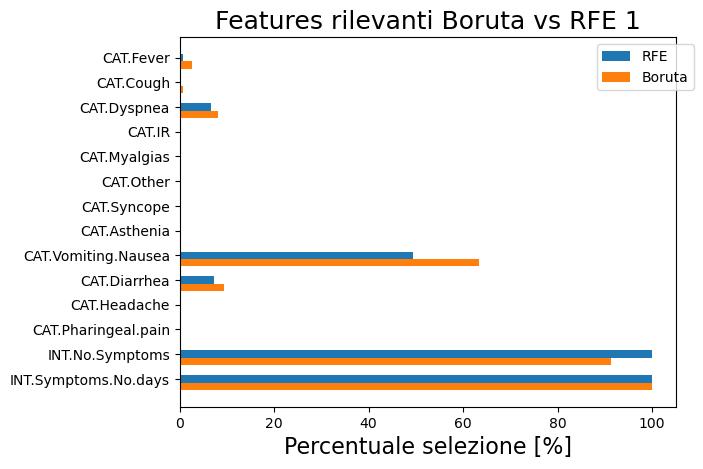

In [47]:
#giusto
#print(np.array(primadivisione_RFE)/(n_it*n_fold)*100)
plt.rcdefaults()
fig, ax = plt.subplots()
bar_width = 0.3
y_pos = np.arange(len(feat1_RFE))

ax.barh(y_pos, np.array(primadivisione_RFE)/(n_it*n_fold)*100,bar_width, align='center', label='RFE')
ax.barh(y_pos+bar_width, np.array(primadivisione_Bor)/(n_it*n_fold)*100,bar_width, align='center',label='Boruta')

ax.set_yticks(y_pos)
ax.set_yticklabels(feat1_RFE)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentuale selezione [%]', fontsize=16)
ax.set_title('Features rilevanti Boruta vs RFE 1',fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper right')
plt.show()

fig.savefig('C:/Users/Utente/Desktop/SMOTE/grafico1.png', format='png')

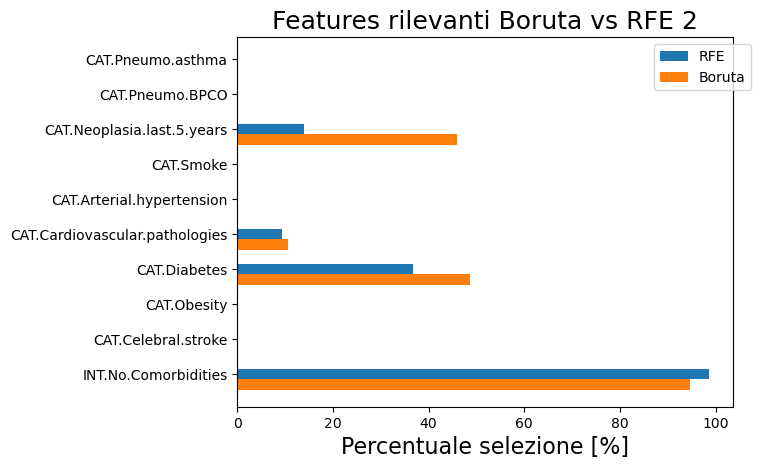

In [45]:
#giusto
#print(np.array(primadivisione_RFE)/(n_it*n_fold)*100)
plt.rcdefaults()
fig, ax = plt.subplots()
bar_width = 0.3
y_pos = np.arange(len(feat2_RFE))

ax.barh(y_pos, np.array(secondadivisione_RFE)/(n_it*n_fold)*100,bar_width, align='center', label='RFE')
ax.barh(y_pos+bar_width, np.array(secondadivisione_Bor)/(n_it*n_fold)*100,bar_width, align='center',label='Boruta')

ax.set_yticks(y_pos)
ax.set_yticklabels(feat2_RFE)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentuale selezione [%]', fontsize=16)
ax.set_title('Features rilevanti Boruta vs RFE 2',fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper right')
plt.show()

fig.savefig('C:/Users/Utente/Desktop/SMOTE/grafico2.png', format='png')

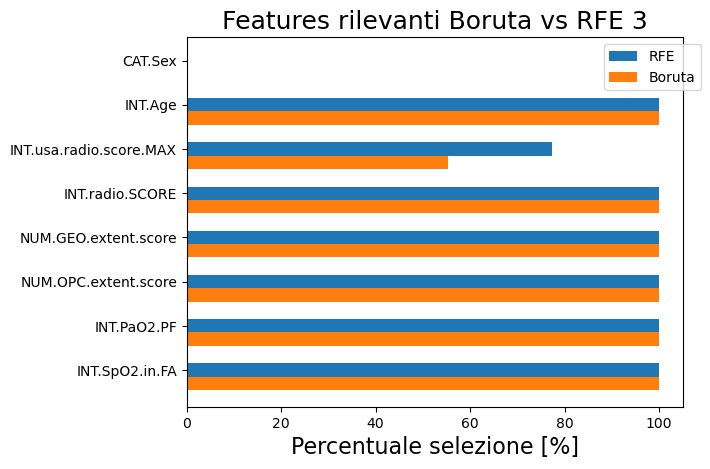

In [43]:
#giusto
#print(np.array(primadivisione_RFE)/(n_it*n_fold)*100)
plt.rcdefaults()
fig, ax = plt.subplots()
bar_width = 0.3
y_pos = np.arange(len(feat3_RFE))

ax.barh(y_pos, np.array(terzadivisione_RFE)/(n_it*n_fold)*100,bar_width, align='center', label='RFE')
ax.barh(y_pos+bar_width, np.array(terzadivisione_Bor)/(n_it*n_fold)*100,bar_width, align='center',label='Boruta')

ax.set_yticks(y_pos)
ax.set_yticklabels(feat3_RFE)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentuale selezione [%]', fontsize=16)
ax.set_title('Features rilevanti Boruta vs RFE 3',fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper right')
plt.show()

fig.savefig('C:/Users/Utente/Desktop/SMOTE/grafico3.png')

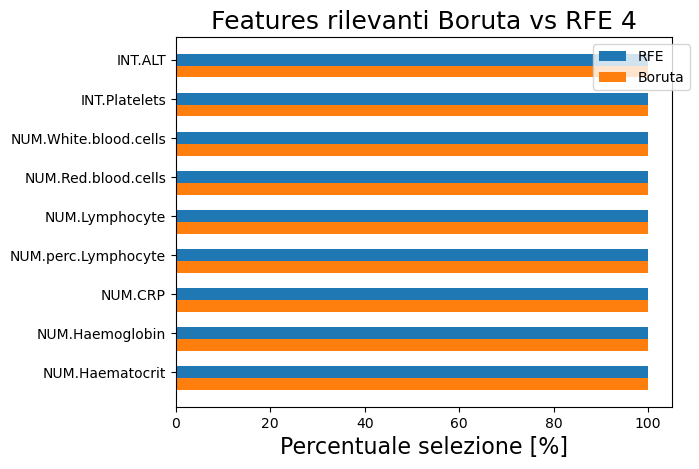

In [42]:
#giusto
#print(np.array(primadivisione_RFE)/(n_it*n_fold)*100)
plt.rcdefaults()
fig, ax = plt.subplots()
bar_width = 0.3
y_pos = np.arange(len(feat4_RFE))

ax.barh(y_pos, np.array(quartadivisione_RFE)/(n_it*n_fold)*100,bar_width, align='center', label='RFE')
ax.barh(y_pos+bar_width, np.array(quartadivisione_Bor)/(n_it*n_fold)*100,bar_width, align='center',label='Boruta')

ax.set_yticks(y_pos)
ax.set_yticklabels(feat4_RFE)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentuale selezione [%]', fontsize=16)
ax.set_title('Features rilevanti Boruta vs RFE 4',fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper right')
plt.show()

fig.savefig('C:/Users/Utente/Desktop/SMOTE/grafico4.png')